# 1. Import packages and libraries
To prepare your environment, you need to install and import packages

In [ ]:
import tensorflow as tf
import numpy as np
import skimage
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation,LSTM,TimeDistributed,UpSampling2D
from keras.optimizers import SGD
from keras.layers import Conv2D,MaxPooling2D,Flatten,Input,Reshape,AveragePooling2D,Conv2DTranspose
from keras.models import Model, Sequential
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.misc import imread, imresize
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from skimage import io, filters,measure
from scipy import ndimage
import matplotlib.pyplot as plt

# 2. initialized parameter

In [2]:
x,y=240,320
inChannel=3
input_img = Input(shape = (x, y, inChannel))
batch_size=5
epochs=100

W0801 13:39:21.980739 140633550526208 deprecation_wrapper.py:119] From /home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0801 13:39:21.998009 140633550526208 deprecation_wrapper.py:119] From /home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



# 3. Create the Datset
for runing the program change your local path that the images saved there

In [5]:
imgcnt=0
imagevec=[]
labelvec=[]

path="/home/p287103/SR/bees/imbee"
name = sorted(os.listdir(path))
for text in name:
    fullpath=path+"/"+text
    currimg=imread(fullpath)
    im=imresize(currimg,[x,y])
    imagevec.append(im)
    imgcnt=imgcnt+1

path="/home/p287103/SR/bees/gt"
name = sorted(os.listdir(path))
for text in name:
    fullpath=path+"/"+text
    currimg=imread(fullpath)
    im=imresize(currimg,[x,y])
    graysmall=ndimage.binary_opening(im)
    labelvec.append(graysmall)

print("number of total image is : %d" % (imgcnt))

/home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/ipykernel_launcher.py:10: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.3.0.
Use Pillow instead: ``numpy.array(Image.fromarray(arr).resize())``.
  # Remove the CWD from sys.path while we load stuff.
/home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/home/p287103/anaconda3/envs/tf/lib/python2.7/site-packages/ipykernel_launcher.py:19: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be 

number of total image is : 118


##  3.1 prepare data for build model

In [12]:
datasize=imgcnt
batch_xs=np.asarray(imagevec)
batch_ys=np.asarray(labelvec)
X_train=batch_xs.reshape(datasize,x, y, inChannel)
Y_train=batch_ys.reshape(datasize,x, y, 1)

# 4. bulil model
## 4.1 create model network

In [7]:
def autoencoder(input_img):
    #encoder
    conv1 = Conv2D(16, (5,5), activation='relu', padding='same')(input_img) 
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) 
    conv2 = Conv2D(32, (5,5), activation='relu', padding='same')(pool1) 
    #decoder
    conv3 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv2) 
    up1= UpSampling2D((2,2))(conv3)
    decoded = Conv2D(1, (5,5), activation='sigmoid', padding='same')(up1)
    return decoded

In [10]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='binary_crossentropy', optimizer = 'adadelta')
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 240, 320, 3)       0         
_________________________________________________________________
model_2 (Model)              (None, 240, 320, 1)       19073     
Total params: 19,073
Trainable params: 19,073
Non-trainable params: 0
_________________________________________________________________


In [ ]:
##4.2 Train the model

In [14]:
autoencoder_train = autoencoder.fit(X_train, Y_train, batch_size=5,epochs=500,verbose=1)


Epoch 1/500
118/118 [==============================] - 3s 30ms/step - loss: 0.3562
Epoch 2/500
118/118 [==============================] - 3s 29ms/step - loss: 0.3501
Epoch 3/500
118/118 [==============================] - 4s 30ms/step - loss: 0.3943
Epoch 4/500
118/118 [==============================] - 4s 30ms/step - loss: 0.3298
Epoch 5/500
118/118 [==============================] - 4s 30ms/step - loss: 0.3354
Epoch 6/500
118/118 [==============================] - 4s 31ms/step - loss: 0.0814
Epoch 7/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0560
Epoch 8/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0528
Epoch 9/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0504
Epoch 10/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0564
Epoch 11/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0424
Epoch 12/500
118/118 [==============================] - 4s 31ms/step - loss: 0.0459
E

118/118 [==============================] - 4s 30ms/step - loss: 0.0269
Epoch 99/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0400
Epoch 100/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0262
Epoch 101/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0259
Epoch 102/500
118/118 [==============================] - 3s 30ms/step - loss: 0.0260
Epoch 103/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0261
Epoch 104/500
118/118 [==============================] - 3s 30ms/step - loss: 0.0263
Epoch 105/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0268
Epoch 106/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0441
Epoch 107/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0609
Epoch 108/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0339
Epoch 109/500
118/118 [==============================] - 3s 29ms/step - loss: 0.

118/118 [==============================] - 9s 73ms/step - loss: 0.0232
Epoch 195/500
118/118 [==============================] - 9s 74ms/step - loss: 0.0230
Epoch 196/500
118/118 [==============================] - 9s 75ms/step - loss: 0.0233
Epoch 197/500
118/118 [==============================] - 10s 86ms/step - loss: 0.0236
Epoch 198/500
118/118 [==============================] - 9s 78ms/step - loss: 0.0236
Epoch 199/500
118/118 [==============================] - 7s 62ms/step - loss: 0.0296
Epoch 200/500
118/118 [==============================] - 5s 38ms/step - loss: 0.0329
Epoch 201/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0235
Epoch 202/500
118/118 [==============================] - 5s 42ms/step - loss: 0.0231
Epoch 203/500
118/118 [==============================] - 3s 30ms/step - loss: 0.0230
Epoch 204/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0230
Epoch 205/500
118/118 [==============================] - 3s 30ms/step - loss: 

118/118 [==============================] - 3s 29ms/step - loss: 0.0222
Epoch 291/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0216
Epoch 292/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0217
Epoch 293/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0225
Epoch 294/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0219
Epoch 295/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0217
Epoch 296/500
118/118 [==============================] - 3s 30ms/step - loss: 0.0218
Epoch 297/500
118/118 [==============================] - 3s 30ms/step - loss: 0.0216
Epoch 298/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0218
Epoch 299/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0223
Epoch 300/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0218
Epoch 301/500
118/118 [==============================] - 3s 29ms/step - loss: 0

118/118 [==============================] - 4s 30ms/step - loss: 0.0193
Epoch 387/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0193
Epoch 388/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0192
Epoch 389/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0200
Epoch 390/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0201
Epoch 391/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0198
Epoch 392/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0200
Epoch 393/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0201
Epoch 394/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0198
Epoch 395/500
118/118 [==============================] - 3s 29ms/step - loss: 0.0202
Epoch 396/500
118/118 [==============================] - 4s 30ms/step - loss: 0.0198
Epoch 397/500
118/118 [==============================] - 4s 30ms/step - loss: 0

118/118 [==============================] - 4s 33ms/step - loss: 0.0184
Epoch 483/500
118/118 [==============================] - 4s 33ms/step - loss: 0.0188
Epoch 484/500
118/118 [==============================] - 4s 32ms/step - loss: 0.0188
Epoch 485/500
118/118 [==============================] - 4s 33ms/step - loss: 0.0188
Epoch 486/500
118/118 [==============================] - 4s 31ms/step - loss: 0.0214
Epoch 487/500
118/118 [==============================] - 4s 31ms/step - loss: 0.0191
Epoch 488/500
118/118 [==============================] - 4s 31ms/step - loss: 0.0179
Epoch 489/500
118/118 [==============================] - 4s 31ms/step - loss: 0.0181
Epoch 490/500
118/118 [==============================] - 4s 31ms/step - loss: 0.0180
Epoch 491/500
118/118 [==============================] - 4s 31ms/step - loss: 0.0180
Epoch 492/500
118/118 [==============================] - 4s 31ms/step - loss: 0.0188
Epoch 493/500
118/118 [==============================] - 4s 32ms/step - loss: 0

In [ ]:
#6. see the result

total number of bees are: 31


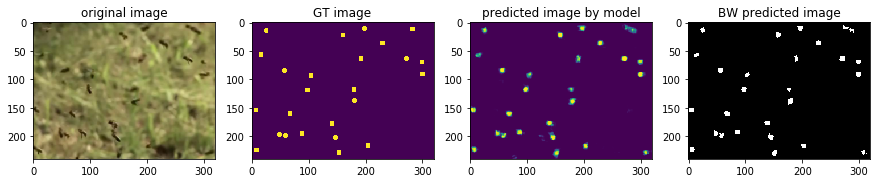

In [22]:
ind=np.random.randint(118)
fig, axs = plt.subplots(1, 5, figsize=(15,4))
im=imagevec[ind]
label=labelvec[ind]
plt.subplot(1, 4,1)
plt.imshow(im)
plt.title('original image')

l = measure.label(im3)
plt.subplot(1, 4,2)
plt.imshow(label)
plt.title('GT image')

X_test = np.reshape(im,(-1,x, y, inChannel))
preds = autoencoder.predict(X_test)
pred=np.reshape(preds,(x, y))
plt.subplot(1,4,3)
plt.imshow(pred)
plt.title('predicted image by model')

io.imsave('1.jpg',pred)
val = filters.threshold_sauvola(label)
drops = ndimage.binary_opening(label)
l = measure.label(drops)
pred=io.imread('1.jpg')
plt.subplot(1,4,4)
plt.title('BW predicted image')

val = filters.threshold_otsu(pred)
im2=pred>val
plt.imshow(im2, cmap='gray')
drops = ndimage.binary_closing(pred )
l = measure.label(im2)
print("total number of bees are: %d" %(l.max()))


In [23]:
import pickle
pickle.dump(autoencoder, open('final_prediction.pickle', 'wb'))